In [217]:
pwd

'C:\\Users\\HP\\Desktop\\17.2.2\\relax_challenge'

In [218]:
import pandas as pd # import pandas 
import numpy as np  #import numpy

In [219]:
df1=pd.read_csv('takehome_user_engagement.csv')  # read one CSV fil
df1.head()


,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [220]:
df1.time_stamp=df1.time_stamp.astype('datetime64') # change dataframe time_stamp feature to datetime feature
df1['week_num']=df1.time_stamp.dt.week #create a new column filling in the week number according to time_stamp column
df1['time_stamp_year']=df1.time_stamp.dt.year # create a new column filling in the information with time_stamp year
df1.head()

,time_stamp,user_id,visited,week_num,time_stamp_year
0,2014-04-22 03:53:30,1,1,17,2014
1,2013-11-15 03:45:04,2,1,46,2013
2,2013-11-29 03:45:04,2,1,48,2013
3,2013-12-09 03:45:04,2,1,50,2013
4,2013-12-25 03:45:04,2,1,52,2013


In [221]:
df2=pd.read_csv('takehome_users.csv',encoding='ISO-8859-1') #read the other csv file
df2.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [222]:
df_inner=pd.merge(df1,df2,left_on='user_id',right_on='object_id') # merge the two dataframe on user_id column and object_id column
df_inner.drop('object_id',axis=1,inplace=True) # drop the object_id column since the same as user_id column
df_inner.head()

,time_stamp,user_id,visited,week_num,time_stamp_year,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,2014-04-22 03:53:30,1,1,17,2014,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2013-11-15 03:45:04,2,1,46,2013,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,2013-11-29 03:45:04,2,1,48,2013,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
3,2013-12-09 03:45:04,2,1,50,2013,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
4,2013-12-25 03:45:04,2,1,52,2013,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0


In [223]:
df=df_inner[['user_id','visited','week_num','time_stamp_year']] #create new dataframe with only listed four columns
df.head()

,user_id,visited,week_num,time_stamp_year
0,1,1,17,2014
1,2,1,46,2013
2,2,1,48,2013
3,2,1,50,2013
4,2,1,52,2013


In [224]:
df_new=df.groupby(['user_id','time_stamp_year','week_num']).sum() # create new dataframe using group by function
df_new

visited
user_id time_stamp_year week_num         
1       2014            17              1
2       2013            1               1
                        46              1
                        48              1
                        50              1
...                                   ...
11996   2013            36              1
11997   2013            3               1
11998   2014            17              1
11999   2012            22              1
12000   2014            4               1

[69277 rows x 1 columns]

In [225]:
criter=df_new.visited>=3 # to create criteria for the value of column visited greater than or equal to 3 
adopted_user=df_new[criter] # filter out rows whose visited column value is greater than or equal to 3
adopted_user

visited
user_id time_stamp_year week_num         
2       2014            6               3
10      2013            9               3
                        15              3
                        17              3
                        18              4
...                                   ...
11988   2014            14              3
                        18              4
                        20              3
                        21              5
                        22              3

[33816 rows x 1 columns]

In [226]:
user_id=adopted_user.index.get_level_values('user_id') # get the user_id from above filtered rows
adopted_user_id=list(set(user_id)) # get unique values of the user_id and make it equal to variable adopted_user_id

In [227]:
print(len(adopted_user_id)) # print out the total counts of unique user_id
print('adopted user_ids are:{}'.format(adopted_user_id)) # print out unique user_id

1444
adopted user_ids are:[8192, 2, 8196, 10, 20, 8214, 8217, 8220, 8221, 33, 8232, 8233, 42, 43, 8235, 8243, 53, 8252, 63, 8258, 8259, 69, 74, 80, 81, 82, 8277, 8278, 87, 8280, 8294, 8297, 8310, 8311, 8319, 133, 135, 141, 8334, 146, 153, 8348, 160, 165, 168, 174, 8366, 185, 188, 8381, 8383, 197, 200, 8393, 202, 203, 8394, 8399, 209, 8401, 8403, 214, 8408, 8415, 230, 8426, 8435, 245, 247, 8440, 263, 265, 8460, 8463, 8466, 275, 280, 283, 297, 298, 8493, 305, 310, 311, 8505, 8507, 8508, 8511, 322, 8523, 341, 8538, 351, 8553, 363, 370, 8569, 8571, 383, 8581, 401, 8593, 8595, 8601, 8602, 418, 8615, 430, 8622, 445, 8639, 8640, 450, 462, 8654, 469, 471, 472, 479, 8673, 483, 8675, 8677, 8679, 492, 494, 497, 8689, 8695, 509, 510, 8701, 512, 8704, 8706, 8708, 518, 8712, 522, 529, 8721, 8725, 535, 540, 547, 553, 8749, 8750, 564, 8760, 572, 8767, 8768, 8770, 8779, 589, 8789, 601, 603, 605, 8803, 8809, 618, 8811, 627, 628, 632, 634, 639, 8832, 8835, 8837, 8857, 8860, 669, 8862, 8864, 8869, 679, 68

In [228]:
df_inner['adopted_user']=np.where(df_inner.user_id.isin(adopted_user_id),1,0) # created a new column to show which user_id is adopted user
df_inner['invited']=np.where(df_inner.creation_source.str.contains('INVITE'),1,0) # created a new column to show if a user is invited or not
df_inner.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207917 entries, 0 to 207916
Data columns (total 16 columns):
time_stamp                    207917 non-null datetime64[ns]
user_id                       207917 non-null int64
visited                       207917 non-null int64
week_num                      207917 non-null int64
time_stamp_year               207917 non-null int64
creation_time                 207917 non-null object
name                          207917 non-null object
email                         207917 non-null object
creation_source               207917 non-null object
last_session_creation_time    207917 non-null float64
opted_in_to_mailing_list      207917 non-null int64
enabled_for_marketing_drip    207917 non-null int64
org_id                        207917 non-null int64
invited_by_user_id            116887 non-null float64
adopted_user                  207917 non-null int32
invited                       207917 non-null int32
dtypes: datetime64[ns](1), float64(2), i

In [253]:
df_adopted=df_inner[df_inner['adopted_user']==1] # set criteria to adopted_user equal to 1 
print('The percentage of adopted user is: {} '.format(len(df_adopted)/len(df_inner))) #calculate the overall adopted user rate

The percentage of adopted user is: 0.9446125136472727 


In [254]:
df_inner.time_stamp_year.value_counts() # count the total values of each unique value within column named time_stamp_year

2013    105725
2014     90337
2012     11855
Name: time_stamp_year, dtype: int64

In [262]:
df_inner

,time_stamp,user_id,visited,week_num,time_stamp_year,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,invited
0,2014-04-22 03:53:30,1,1,17,2014,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0,1
1,2013-11-15 03:45:04,2,1,46,2013,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1,1
2,2013-11-29 03:45:04,2,1,48,2013,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1,1
3,2013-12-09 03:45:04,2,1,50,2013,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1,1
4,2013-12-25 03:45:04,2,1,52,2013,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207912,2013-09-06 06:14:15,11996,1,36,2013,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0,0,1
207913,2013-01-15 18:28:37,11997,1,3,2013,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,NaN,0,0
207914,2014-04-27 12:45:16,11998,1,17,2014,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0,0,1
207915,2012-06-02 11:55:59,11999,1,22,2012,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,NaN,0,0


In [283]:
df_2014_cri=df_inner['time_stamp_year']==2014 #set criter to time_stamp_year equals to 2014
df_2014=df_inner[df_2014_cri] #filter out rows with above criteria
adopted_rate_2014=(len(df_2014[df_2014.adopted_user==1]))/(len(df_2014)) #calculate adopted user rate with year 2014
print('The percentage of adopted user within year 2014 is {}'.format( adopted_rate_2014))


The percentage of adopted user within year 2014 is 0.9516366494348938


In [284]:
df_2013_cri=df_inner['time_stamp_year']==2013 #set criter to time_stamp_year equals to 2013
df_2013=df_inner[df_2013_cri] #filter out rows with above criteria
adopted_rate_2013=(len(df_2013[df_2013.adopted_user==1]))/(len(df_2013)) #calculate adopted user rate with year 2013
print('The percentage of adopted user within year 2013 is {}'.format( adopted_rate_2013))

The percentage of adopted user within year 2014 is 0.9535776779380468


In [285]:
df_2012_cri=df_inner['time_stamp_year']==2012 #set criter to time_stamp_year equals to 2013
df_2012=df_inner[df_2012_cri] #filter out rows with above criteria
adopted_rate_2012=(len(df_2012[df_2012.adopted_user==1]))/(len(df_2012))
print('The percentage of adopted user within year 2012 is {}'.format( adopted_rate_2012))  #calculate adopted user rate with year 2012

The percentage of adopted user within year 2012 is 0.8111345423871784


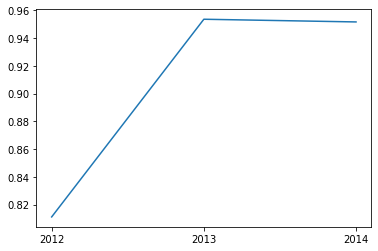

In [291]:
plt.plot([2012,2013,2014],[adopted_rate_2012,adopted_rate_2013,adopted_rate_2014]) # plot the adopted user rate over years 
plt.xticks([2012, 2013, 2014]) # set plot ticks
plt.show()

In [229]:
df_ana=df_inner.drop(['user_id','visited','name','email','invited_by_user_id','org_id'],axis=1) #drop unmeaningful columns from dataframe
df_ana.info() # check dataframe info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207917 entries, 0 to 207916
Data columns (total 10 columns):
time_stamp                    207917 non-null datetime64[ns]
week_num                      207917 non-null int64
time_stamp_year               207917 non-null int64
creation_time                 207917 non-null object
creation_source               207917 non-null object
last_session_creation_time    207917 non-null float64
opted_in_to_mailing_list      207917 non-null int64
enabled_for_marketing_drip    207917 non-null int64
adopted_user                  207917 non-null int32
invited                       207917 non-null int32
dtypes: datetime64[ns](1), float64(1), int32(2), int64(4), object(2)
memory usage: 15.9+ MB


In [230]:
from sklearn.preprocessing import LabelEncoder #import LabelEncoder
le=LabelEncoder() #initiate LabelEncoder
df_ana.creation_source=le.fit_transform(df_ana.creation_source) #fit and transform creation_source column
df_ana

,time_stamp,week_num,time_stamp_year,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,adopted_user,invited
0,2014-04-22 03:53:30,17,2014,2014-04-22 03:53:30,0,1.398139e+09,1,0,0,1
1,2013-11-15 03:45:04,46,2013,2013-11-15 03:45:04,1,1.396238e+09,0,0,1,1
2,2013-11-29 03:45:04,48,2013,2013-11-15 03:45:04,1,1.396238e+09,0,0,1,1
3,2013-12-09 03:45:04,50,2013,2013-11-15 03:45:04,1,1.396238e+09,0,0,1,1
4,2013-12-25 03:45:04,52,2013,2013-11-15 03:45:04,1,1.396238e+09,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
207912,2013-09-06 06:14:15,36,2013,2013-09-06 06:14:15,1,1.378448e+09,0,0,0,1
207913,2013-01-15 18:28:37,3,2013,2013-01-10 18:28:37,4,1.358275e+09,0,0,0,0
207914,2014-04-27 12:45:16,17,2014,2014-04-27 12:45:16,0,1.398603e+09,1,1,0,1
207915,2012-06-02 11:55:59,22,2012,2012-05-31 11:55:59,2,1.338638e+09,0,0,0,0


In [231]:
df_ana['time_stamp_month']=df_ana.time_stamp.dt.month #create new column 
df_ana

,time_stamp,week_num,time_stamp_year,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,adopted_user,invited,time_stamp_month
0,2014-04-22 03:53:30,17,2014,2014-04-22 03:53:30,0,1.398139e+09,1,0,0,1,4
1,2013-11-15 03:45:04,46,2013,2013-11-15 03:45:04,1,1.396238e+09,0,0,1,1,11
2,2013-11-29 03:45:04,48,2013,2013-11-15 03:45:04,1,1.396238e+09,0,0,1,1,11
3,2013-12-09 03:45:04,50,2013,2013-11-15 03:45:04,1,1.396238e+09,0,0,1,1,12
4,2013-12-25 03:45:04,52,2013,2013-11-15 03:45:04,1,1.396238e+09,0,0,1,1,12
...,...,...,...,...,...,...,...,...,...,...,...
207912,2013-09-06 06:14:15,36,2013,2013-09-06 06:14:15,1,1.378448e+09,0,0,0,1,9
207913,2013-01-15 18:28:37,3,2013,2013-01-10 18:28:37,4,1.358275e+09,0,0,0,0,1
207914,2014-04-27 12:45:16,17,2014,2014-04-27 12:45:16,0,1.398603e+09,1,1,0,1,4
207915,2012-06-02 11:55:59,22,2012,2012-05-31 11:55:59,2,1.338638e+09,0,0,0,0,6


In [235]:
df_ana.last_session_creation_time=pd.to_datetime(df_ana.last_session_creation_time,unit='s') #convert last_session_creation_time to datetime type
df_ana.creation_time=pd.to_datetime(df_ana.creation_time) #convert creation_time column to datetime type
df_ana['last_session_year']=df_ana.last_session_creation_time.dt.year # get year informatin from last_session_year column
df_ana['last_session_month']=df_ana.last_session_creation_time.dt.month # get month informatin from last_session_year column
df_ana['creation_year']=df_ana.creation_time.dt.year # get year informatin from creation_year column
df_ana['creation_month']=df_ana.creation_time.dt.month # get month informatin from creation_year column
df_ana

,time_stamp,week_num,time_stamp_year,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,adopted_user,invited,time_stamp_month,creation_year,creation_month,last_session_year,last_session_month
0,2014-04-22 03:53:30,17,2014,2014-04-22 03:53:30,0,2014-04-22 03:53:30,1,0,0,1,4,2014,4,2014,4
1,2013-11-15 03:45:04,46,2013,2013-11-15 03:45:04,1,2014-03-31 03:45:04,0,0,1,1,11,2013,11,2014,3
2,2013-11-29 03:45:04,48,2013,2013-11-15 03:45:04,1,2014-03-31 03:45:04,0,0,1,1,11,2013,11,2014,3
3,2013-12-09 03:45:04,50,2013,2013-11-15 03:45:04,1,2014-03-31 03:45:04,0,0,1,1,12,2013,11,2014,3
4,2013-12-25 03:45:04,52,2013,2013-11-15 03:45:04,1,2014-03-31 03:45:04,0,0,1,1,12,2013,11,2014,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207912,2013-09-06 06:14:15,36,2013,2013-09-06 06:14:15,1,2013-09-06 06:14:15,0,0,0,1,9,2013,9,2013,9
207913,2013-01-15 18:28:37,3,2013,2013-01-10 18:28:37,4,2013-01-15 18:28:37,0,0,0,0,1,2013,1,2013,1
207914,2014-04-27 12:45:16,17,2014,2014-04-27 12:45:16,0,2014-04-27 12:45:16,1,1,0,1,4,2014,4,2014,4
207915,2012-06-02 11:55:59,22,2012,2012-05-31 11:55:59,2,2012-06-02 11:55:59,0,0,0,0,6,2012,5,2012,6


In [236]:
df_ana.drop(['time_stamp','creation_time','last_session_creation_time'],axis=1,inplace=True) # drop mentioned three columns from dataframe
df_ana

,week_num,time_stamp_year,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,adopted_user,invited,time_stamp_month,creation_year,creation_month,last_session_year,last_session_month
0,17,2014,0,1,0,0,1,4,2014,4,2014,4
1,46,2013,1,0,0,1,1,11,2013,11,2014,3
2,48,2013,1,0,0,1,1,11,2013,11,2014,3
3,50,2013,1,0,0,1,1,12,2013,11,2014,3
4,52,2013,1,0,0,1,1,12,2013,11,2014,3
...,...,...,...,...,...,...,...,...,...,...,...,...
207912,36,2013,1,0,0,0,1,9,2013,9,2013,9
207913,3,2013,4,0,0,0,0,1,2013,1,2013,1
207914,17,2014,0,1,1,0,1,4,2014,4,2014,4
207915,22,2012,2,0,0,0,0,6,2012,5,2012,6


In [175]:
import matplotlib.pyplot as plt #import pyplotlib as plt
import seaborn as sn #import seaborn

In [237]:
df_ana.corr() # calcuate the Pearson coefficient corelation

,week_num,time_stamp_year,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,adopted_user,invited,time_stamp_month,creation_year,creation_month,last_session_year,last_session_month
week_num,1.000000,-0.672600,0.000610,-0.008013,-0.003163,-0.003182,-0.000802,0.968852,-0.109857,0.028793,-0.096185,0.139356
time_stamp_year,-0.672600,1.000000,0.009473,0.010472,-0.005046,0.078904,-0.008436,-0.687279,0.341679,-0.059094,0.316319,-0.145211
creation_source,0.000610,0.009473,1.000000,-0.040791,-0.034312,-0.004014,-0.899949,0.000940,-0.034457,0.071190,0.016174,0.010717
opted_in_to_mailing_list,-0.008013,0.010472,-0.040791,1.000000,0.472487,0.004166,0.032082,-0.007776,0.034393,-0.033697,-0.003408,-0.021533
enabled_for_marketing_drip,-0.003163,-0.005046,-0.034312,0.472487,1.000000,0.000093,0.051981,-0.003022,-0.028374,0.025901,-0.003494,-0.043123
adopted_user,-0.003182,0.078904,-0.004014,0.004166,0.000093,1.000000,-0.000336,-0.001065,-0.264795,0.075918,0.577606,-0.081519
invited,-0.000802,-0.008436,-0.899949,0.032082,0.051981,-0.000336,1.000000,-0.001228,0.021715,-0.064058,-0.013913,-0.014983
time_stamp_month,0.968852,-0.687279,0.000940,-0.007776,-0.003022,-0.001065,-0.001228,1.000000,-0.112219,0.031454,-0.095439,0.139637
creation_year,-0.109857,0.341679,-0.034457,0.034393,-0.028374,-0.264795,0.021715,-0.112219,1.000000,-0.584408,0.026990,-0.103763
creation_month,0.028793,-0.059094,0.071190,-0.033697,0.025901,0.075918,-0.064058,0.031454,-0.584408,1.000000,-0.026499,0.110548


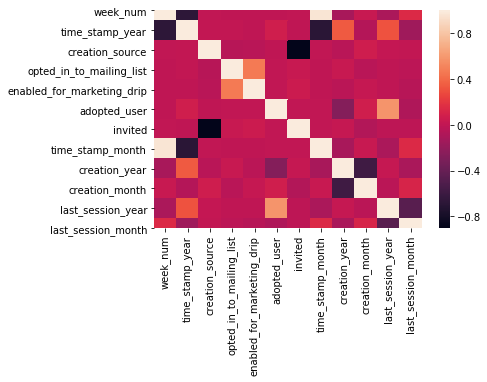

In [238]:
sn.heatmap(df_ana.corr()) # plot Pearson coefficient correlation

In [239]:
df_ana.drop('week_num',axis=1,inplace=True) # drop week number column since highly related to time_stamp_month column

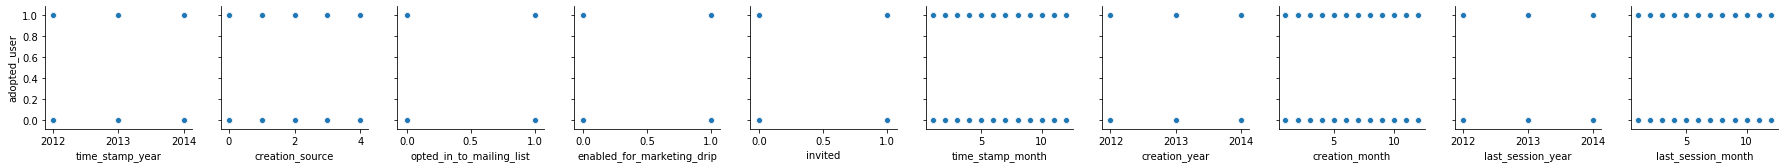

In [249]:
sn.pairplot(df_ana,x_vars=['time_stamp_year','creation_source','opted_in_to_mailing_list','enabled_for_marketing_drip','invited','time_stamp_month','creation_year','creation_month','last_session_year','last_session_month'],
                    y_vars=['adopted_user']) # do the pairplot to see the relationship between target column and other feautre columns
plt.show() # show the plot


In [293]:
feature=df_ana.drop('adopted_user',axis=1) # drop target column to form feature columns
target=df_ana.adopted_user #extract out target column

In [299]:
from sklearn.feature_selection import SelectKBest #import KBeset

kb=SelectKBest(k=3) #initiate SelectKBest
kb_score=kb.fit(feature,target).scores_ # get score of each feature
print(list(zip(feature.columns, kb_score))) # print out feature name and corresponding scores


[('time_stamp_year', 1302.5685922399773), ('creation_source', 3.3497746219045674), ('opted_in_to_mailing_list', 3.6085309920632285), ('enabled_for_marketing_drip', 0.0018010613062795983), ('invited', 0.02344424319561176), ('time_stamp_month', 0.23601671436382818), ('creation_year', 15677.462784918866), ('creation_month', 1205.2742471415781), ('last_session_year', 104095.54554736849), ('last_session_month', 1390.9162021743834)]


In [301]:
pwd

'C:\\Users\\HP\\Desktop\\17.2.2\\relax_challenge'